# Problem Set: Thinking About Change

## Get Word Lists for each Sector

In [2]:
def getWordList(file):
    word_list = []
    with open(file) as f:
        word_list = f.read().lower().splitlines()
    print(word_list)
    return word_list

In [3]:
general_list = getWordList('general_list.txt')
tech_list = getWordList('tech_list.txt')
energy_list = getWordList('energy_list.txt')
cd_list = getWordList('cd_list.txt')

['emissions', 'pollution', 'warming', 'environment', 'ecosystem', 'greenhouse', 'sea-level', 'conference of paris', 'weather', 'atmosphere', 'climate']
['solar', 'reusable', 'renewable', 'nuclear', 'carbon', 'neutral', 'greenhouse', 'energy efficient', 'carbon emissions', 'environment', 'electricity']
['oil', 'gas', 'emission-free', 'emissionless', 'fossil', 'fracking', 'climate-related', 'ecosystem', 'low-carbon', 'sustainability', 'petroleum']
['carbon', 'footprint', 'recycle', 'preventative', 'climate fund', 'biosphere', 'landfills', 'environmental', 'clean power', 'reduce', 'deforestation']


In [4]:
# Install a conda package in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} datetime

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - datetime

Current channels:

  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [5]:
import pandas as pd
import datetime as dt
import dask
import glob
import json
import numpy as np
from edgar import Company, TXTML
from edgar import Edgar
import nltk
from nltk.corpus import stopwords
from textblob import Word
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

In [6]:
def get_edgar(ll, n,file_type):
    filinglist = []
    for el in ll:
        company = Company(el[0], el[1])
        tree = company.get_all_filings(filing_type = file_type)
        docs = Company.get_documents(tree, no_of_documents=n, as_documents=True)
        texts = Company.get_documents(tree, no_of_documents=n, as_documents=False)
        if n<2:
            docs=[docs]
            texts=[texts]
        for i in range(n):
            date = docs[i].content['Filing Date']
            dateStr = str(date)
            year = date[:4]
            text = TXTML.parse_full_10K(texts[i])
            filinglist.append([el[0],el[1],file_type,date,year,text])
    df = pd.DataFrame(filinglist, columns=['Company','CIK','Filing_Type','Filing_Date','Year','TEXT'])
    return df

## Requesting Company Data

In [7]:
tech_companies = [
    ['Alphabet Inc.','0001652044'],
    ['Apple Inc.', '0000320193'],
    ['Microsoft Corp','0000789019'],
    ['IBM Corp', '0000051143'],
    ['INTEL CORP', "50863"]
]

energy_companies = [
    ['EXXON MOBIL CORP','0000034088'],
    ['CHEVRON CORP', '0000093410'],
    ['MARATHON OIL CORP','0000101778'],
    ['Phillips 66', '0001534701'],
    ['Energy Transfer LP', '0001276187']
]

cd_companies = [
    ['MGM Resorts International','0000789570'],
    ['EBAY INC', '0001065088'],
    ['FORD MOTOR CO','0000037996'],
    ['Tesla, Inc.', '0001318605'],
    ['ETSY INC', '0001370637']
]

In [8]:
tech_companiesDF= get_edgar(tech_companies,5,"10-K")
tech_companiesDF

,Company,CIK,Filing_Type,Filing_Date,Year,TEXT
0,Alphabet Inc.,0001652044,10-K,2020-02-04,2020,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...
1,Alphabet Inc.,0001652044,10-K,2019-02-06,2019,\n\nAmendment No. 1 to Form 10-K\n\n \n\n \...
2,Alphabet Inc.,0001652044,10-K,2019-02-05,2019,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nUN...
3,Alphabet Inc.,0001652044,10-K,2018-02-06,2018,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nUN...
4,Alphabet Inc.,0001652044,10-K,2017-02-03,2017,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nUN...
5,Apple Inc.,0000320193,10-K,2020-10-30,2020,\n\n\n\n\naapl-20200926truetruetruetruetruetru...
6,Apple Inc.,0000320193,10-K,2019-10-31,2019,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...
7,Apple Inc.,0000320193,10-K,2018-11-05,2018,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\n U...
8,Apple Inc.,0000320193,10-K,2017-11-03,2017,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\n U...
9,Apple Inc.,0000320193,10-K,2016-10-26,2016,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\n U...


In [9]:
energy_companiesDF = get_edgar(energy_companies,5,"10-K")
energy_companiesDF

,Company,CIK,Filing_Type,Filing_Date,Year,TEXT
0,EXXON MOBIL CORP,0000034088,10-K,2020-02-26,2020,\n\n\n\n\n\n\n\n\n\n 0.086252036-04-012021-08-...
1,EXXON MOBIL CORP,0000034088,10-K,2019-02-27,2019,\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n \n\n\n\n...
2,EXXON MOBIL CORP,0000034088,10-K,2018-02-28,2018,\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n \n\n\n\n...
3,EXXON MOBIL CORP,0000034088,10-K,2017-02-22,2017,\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n \n\n\n\n...
4,EXXON MOBIL CORP,0000034088,10-K,2016-02-24,2016,\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n \n\n\n\n...
5,CHEVRON CORP,0000093410,10-K,2020-02-21,2020,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...
6,CHEVRON CORP,0000093410,10-K,2019-02-22,2019,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\n U...
7,CHEVRON CORP,0000093410,10-K,2018-02-22,2018,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\n U...
8,CHEVRON CORP,0000093410,10-K,2017-02-23,2017,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\n U...
9,CHEVRON CORP,0000093410,10-K,2016-02-25,2016,\n\n\n\t\n\t\t\n\t\t\n\t\t10-K\n\t\n\t\n UNITE...


In [10]:
cd_companiesDF = get_edgar(cd_companies,5,"10-K")
cd_companiesDF

,Company,CIK,Filing_Type,Filing_Date,Year,TEXT
0,MGM Resorts International,0000789570,10-K,2020-02-27,2020,\n\n\n\n\n\n\n\n\n\n\n\nmgm-10k_20191231.htm\n...
1,MGM Resorts International,0000789570,10-K,2019-02-27,2019,\n\n\n\n\nmgm-10k_20181231.htm\n\n\n\n\n\n \n ...
2,MGM Resorts International,0000789570,10-K,2018-03-01,2018,\n\n\n\n\nmgm-10k_20171231.htm\n\n\n\n\n\n \n ...
3,MGM Resorts International,0000789570,10-K,2017-03-01,2017,\n\n\n\n\nmgm-10k_20161231.htm\n\n\n\n\n\n \n ...
4,MGM Resorts International,0000789570,10-K,2016-02-29,2016,\n\n\n\n\nmgm-10k_20151231.htm\n\n\n\n\n\n \n ...
5,EBAY INC,0001065088,10-K,2020-04-29,2020,\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...
6,EBAY INC,0001065088,10-K,2020-01-31,2020,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...
7,EBAY INC,0001065088,10-K,2019-01-30,2019,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...
8,EBAY INC,0001065088,10-K,2018-02-05,2018,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...
9,EBAY INC,0001065088,10-K,2017-02-06,2017,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\n ...


In [11]:
cd_companiesDF.index.name = 'Index'
tech_companiesDF.index.name = 'Index'
energy_companiesDF.index.name = 'Index'

In [12]:
cd_companiesDF['Index'] = cd_companiesDF.index
tech_companiesDF['Index'] = cd_companiesDF.index
energy_companiesDF['Index'] = cd_companiesDF.index

#### Combine all dataframes

In [13]:
tech_companiesDF['Sector'] = 'Technology'
energy_companiesDF['Sector']='Energy'
cd_companiesDF['Sector'] = 'Consumer Discretionary'

In [14]:
all_DF = pd.concat([tech_companiesDF, energy_companiesDF,cd_companiesDF], axis=0)
all_DF

,Company,CIK,Filing_Type,Filing_Date,Year,TEXT,Index,Sector
Index,,,,,,,,
0,Alphabet Inc.,0001652044,10-K,2020-02-04,2020,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,0,Technology
1,Alphabet Inc.,0001652044,10-K,2019-02-06,2019,\n\nAmendment No. 1 to Form 10-K\n\n \n\n \...,1,Technology
2,Alphabet Inc.,0001652044,10-K,2019-02-05,2019,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nUN...,2,Technology
3,Alphabet Inc.,0001652044,10-K,2018-02-06,2018,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nUN...,3,Technology
4,Alphabet Inc.,0001652044,10-K,2017-02-03,2017,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nUN...,4,Technology
...,...,...,...,...,...,...,...,...
20,ETSY INC,0001370637,10-K,2020-02-27,2020,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...,20,Consumer Discretionary
21,ETSY INC,0001370637,10-K,2019-02-28,2019,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nUN...,21,Consumer Discretionary
22,ETSY INC,0001370637,10-K,2018-03-01,2018,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nUN...,22,Consumer Discretionary


## Cleaning Text

### Clean text function

In [15]:
#stopwords
nltk.download('words')
stop = set(stopwords.words('english'))

def clean_text(DF): 
    #lowercase
    DF['TEXT'] = DF['TEXT'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

    #remove punctuation
    DF['TEXT'] = DF['TEXT'].str.replace('[^\w\s]','').replace('/_/g', "")

    #remove stopwords
    DF['TEXT'] = DF['TEXT'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

    #remove numbers
    DF['TEXT'] = DF['TEXT'].str.replace('\d+', '')

    #remove non-english words
    words = set(nltk.corpus.words.words())

    DF['TEXT'] = DF['TEXT'].apply(lambda x: " ".join(x for x in str(x).split() if x.lower() in words or not x.isalpha()))
    
    return DF

[nltk_data] Downloading package words to /users/asumpon/nltk_data...
[nltk_data]   Package words is already up-to-date!


### Clean dataframes

In [16]:
tech_companiesDF = clean_text(tech_companiesDF)
energy_companiesDF = clean_text(energy_companiesDF)
cd_companiesDF = clean_text(cd_companiesDF)
all_DF = clean_text(all_DF)

#### Remove frequent words function

In [17]:
#remove frequent words
def remove_freq(DF):
    freq = pd.Series(' '.join(DF['TEXT']).split()).value_counts()[:10]
    freq

    freq = list(freq.index)
    DF['TEXT'] = DF['TEXT'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
    DF['TEXT'].head()
    return DF

#### Remove frequent words from dataframe

In [18]:
remove_freq(tech_companiesDF)
remove_freq(energy_companiesDF)
remove_freq(cd_companiesDF)
remove_freq(all_DF)

,Company,CIK,Filing_Type,Filing_Date,Year,TEXT,Index,Sector
Index,,,,,,,,
0,Alphabet Inc.,0001652044,10-K,2020-02-04,2020,document united exchange _____________________...,0,Technology
1,Alphabet Inc.,0001652044,10-K,2019-02-06,2019,amendment form k united exchange commission fo...,1,Technology
2,Alphabet Inc.,0001652044,10-K,2019-02-05,2019,document united exchange _____________________...,2,Technology
3,Alphabet Inc.,0001652044,10-K,2018-02-06,2018,document united exchange _____________________...,3,Technology
4,Alphabet Inc.,0001652044,10-K,2017-02-03,2017,document united exchange _____________________...,4,Technology
...,...,...,...,...,...,...,...,...
20,ETSY INC,0001370637,10-K,2020-02-27,2020,document united exchange _____________________...,20,Consumer Discretionary
21,ETSY INC,0001370637,10-K,2019-02-28,2019,document united exchange _____________________...,21,Consumer Discretionary
22,ETSY INC,0001370637,10-K,2018-03-01,2018,document united exchange _____________________...,22,Consumer Discretionary


### Cleaned Data Frames

In [19]:
tech_companies = tech_companiesDF[['Company', 'CIK', 'Filing_Date', 'Year','Sector','TEXT']].sort_values(by='Filing_Date', ascending=True)
energy_companies = energy_companiesDF[['Company', 'CIK', 'Filing_Date', 'Year','Sector','TEXT']].sort_values(by='Filing_Date', ascending=True)
cd_companies = cd_companiesDF[['Company', 'CIK', 'Filing_Date', 'Year','Sector','TEXT']].sort_values(by='Filing_Date', ascending=True)
all_DF = all_DF[['Company', 'CIK', 'Filing_Date', 'Year','Sector','TEXT']].sort_values(by='Filing_Date', ascending=True)

In [54]:
all_DF

,Company,CIK,Filing_Date,Year,Sector,TEXT,Frequency
Index,,,,,,,
7,EBAY INC,0001065088,2019-01-30,2019,Consumer Discretionary,document accelerated united exchange commissio...,3
5,EBAY INC,0001065088,2020-04-29,2020,Consumer Discretionary,true large accelerated filer table contents un...,0
21,ETSY INC,0001370637,2019-02-28,2019,Consumer Discretionary,document united exchange _____________________...,10
15,"Tesla, Inc.",0001318605,2020-04-28,2020,Consumer Discretionary,tslaka_htm false large accelerated filer unite...,0
20,ETSY INC,0001370637,2020-02-27,2020,Consumer Discretionary,document united exchange _____________________...,13
...,...,...,...,...,...,...,...
11,Microsoft Corp,0000789019,2019-08-01,2019,Technology,msftk_htm united exchange commission form k an...,19
16,IBM Corp,0000051143,2019-02-26,2019,Technology,click rapidly navigate document united exchang...,18
1,Alphabet Inc.,0001652044,2019-02-06,2019,Technology,amendment form k united exchange commission fo...,0


In [21]:
all_DF.rename(columns={'Unnamed: 0':'Index'},inplace=True) # Rename our index column

In [22]:
all_DF

,Company,CIK,Filing_Date,Year,Sector,TEXT
Index,,,,,,
24,INTEL CORP,50863,2016-02-12,2016,Technology,k united exchange form report pursuant section...
19,Phillips 66,0001534701,2016-02-19,2016,Energy,k table united exchange commission form k mark...
19,IBM Corp,0000051143,2016-02-23,2016,Technology,click rapidly navigate document united exchang...
4,EXXON MOBIL CORP,0000034088,2016-02-24,2016,Energy,united exchange commission form k annual repor...
9,CHEVRON CORP,0000093410,2016-02-25,2016,Energy,k united exchange commission form k annual rep...
...,...,...,...,...,...,...
20,ETSY INC,0001370637,2020-02-27,2020,Consumer Discretionary,document united exchange _____________________...
15,"Tesla, Inc.",0001318605,2020-04-28,2020,Consumer Discretionary,tslaka_htm false large accelerated filer unite...
5,EBAY INC,0001065088,2020-04-29,2020,Consumer Discretionary,true large accelerated filer table contents un...


## Frequency of Special Words

In [23]:
def special_freq(DF, sector_list):
    freqList = []
    for text in DF['TEXT']:
        wordlist = text.split()
        clean_words = []
        for word in wordlist:
            if word in general_list:
                clean_words.append(Word(re.sub("[^a-zA-Z]+", "", word)).lemmatize())
            if word in sector_list:
                clean_words.append(Word(re.sub("[^a-zA-Z]+", "", word)).lemmatize())
        count = Counter(clean_words)
        total = 0
        for w, frequency in count.items():
            total = total + frequency
        freqList.append(total)
    return freqList

In [24]:
tech_companiesDF['Frequency'] = special_freq(tech_companiesDF, tech_list)
energy_companiesDF['Frequency'] = special_freq(energy_companiesDF, energy_list)
cd_companiesDF['Frequency'] = special_freq(cd_companiesDF, cd_list)
all_DF['Frequency'] = special_freq(all_DF,[])

In [25]:
tech_companiesDF

,Company,CIK,Filing_Type,Filing_Date,Year,TEXT,Index,Sector,Frequency
Index,,,,,,,,,
0,Alphabet Inc.,0001652044,10-K,2020-02-04,2020,document united exchange _____________________...,0,Technology,29
1,Alphabet Inc.,0001652044,10-K,2019-02-06,2019,amendment form k united exchange commission fo...,1,Technology,0
2,Alphabet Inc.,0001652044,10-K,2019-02-05,2019,document united exchange _____________________...,2,Technology,16
3,Alphabet Inc.,0001652044,10-K,2018-02-06,2018,document united exchange _____________________...,3,Technology,10
4,Alphabet Inc.,0001652044,10-K,2017-02-03,2017,document united exchange _____________________...,4,Technology,9
5,Apple Inc.,0000320193,10-K,2020-10-30,2020,exchange form one annual report pursuant secti...,5,Technology,5
6,Apple Inc.,0000320193,10-K,2019-10-31,2019,document united exchange form k mark one annua...,6,Technology,5
7,Apple Inc.,0000320193,10-K,2018-11-05,2018,document united exchange form k mark one annua...,7,Technology,7
8,Apple Inc.,0000320193,10-K,2017-11-03,2017,document united exchange form k mark one annua...,8,Technology,5


In [26]:
energy_companiesDF

,Company,CIK,Filing_Type,Filing_Date,Year,TEXT,Index,Sector,Frequency
Index,,,,,,,,,
0,EXXON MOBIL CORP,0000034088,10-K,2020-02-26,2020,united exchange commission form k annual repor...,0,Energy,88
1,EXXON MOBIL CORP,0000034088,10-K,2019-02-27,2019,united exchange commission form k annual repor...,1,Energy,89
2,EXXON MOBIL CORP,0000034088,10-K,2018-02-28,2018,united exchange commission form k annual repor...,2,Energy,86
3,EXXON MOBIL CORP,0000034088,10-K,2017-02-22,2017,united exchange commission form k annual repor...,3,Energy,82
4,EXXON MOBIL CORP,0000034088,10-K,2016-02-24,2016,united exchange commission form k annual repor...,4,Energy,84
5,CHEVRON CORP,0000093410,10-K,2020-02-21,2020,document note beginning page finance lease end...,5,Energy,91
6,CHEVRON CORP,0000093410,10-K,2019-02-22,2019,document united exchange commission form k ann...,6,Energy,85
7,CHEVRON CORP,0000093410,10-K,2018-02-22,2018,document united exchange commission form k ann...,7,Energy,77
8,CHEVRON CORP,0000093410,10-K,2017-02-23,2017,document united exchange commission form k ann...,8,Energy,78


In [27]:
cd_companiesDF

,Company,CIK,Filing_Type,Filing_Date,Year,TEXT,Index,Sector,Frequency
Index,,,,,,,,,
0,MGM Resorts International,0000789570,10-K,2020-02-27,2020,mgmk_htm false large accelerated filer de leas...,0,Consumer Discretionary,48
1,MGM Resorts International,0000789570,10-K,2019-02-27,2019,mgmk_htm united exchange commission form k mar...,1,Consumer Discretionary,47
2,MGM Resorts International,0000789570,10-K,2018-03-01,2018,mgmk_htm united exchange commission form k mar...,2,Consumer Discretionary,51
3,MGM Resorts International,0000789570,10-K,2017-03-01,2017,mgmk_htm united exchange commission form k mar...,3,Consumer Discretionary,45
4,MGM Resorts International,0000789570,10-K,2016-02-29,2016,mgmk_htm united exchange commission form k mar...,4,Consumer Discretionary,63
5,EBAY INC,0001065088,10-K,2020-04-29,2020,true large accelerated filer table contents un...,5,Consumer Discretionary,6
6,EBAY INC,0001065088,10-K,2020-01-31,2020,document united exchange commission form k ann...,6,Consumer Discretionary,38
7,EBAY INC,0001065088,10-K,2019-01-30,2019,document accelerated united exchange commissio...,7,Consumer Discretionary,41
8,EBAY INC,0001065088,10-K,2018-02-05,2018,document accelerated united exchange commissio...,8,Consumer Discretionary,38


In [28]:
all_DF

,Company,CIK,Filing_Date,Year,Sector,TEXT,Frequency
Index,,,,,,,
24,INTEL CORP,50863,2016-02-12,2016,Technology,k united exchange form report pursuant section...,26
19,Phillips 66,0001534701,2016-02-19,2016,Energy,k table united exchange commission form k mark...,44
19,IBM Corp,0000051143,2016-02-23,2016,Technology,click rapidly navigate document united exchang...,20
4,EXXON MOBIL CORP,0000034088,2016-02-24,2016,Energy,united exchange commission form k annual repor...,41
9,CHEVRON CORP,0000093410,2016-02-25,2016,Energy,k united exchange commission form k annual rep...,30
...,...,...,...,...,...,...,...
20,ETSY INC,0001370637,2020-02-27,2020,Consumer Discretionary,document united exchange _____________________...,13
15,"Tesla, Inc.",0001318605,2020-04-28,2020,Consumer Discretionary,tslaka_htm false large accelerated filer unite...,0
5,EBAY INC,0001065088,2020-04-29,2020,Consumer Discretionary,true large accelerated filer table contents un...,0


## Visualizations

### Plot Frequency for Entire Sector

Text(0.5, 1.0, 'Line Plot: Year vs Frequency')

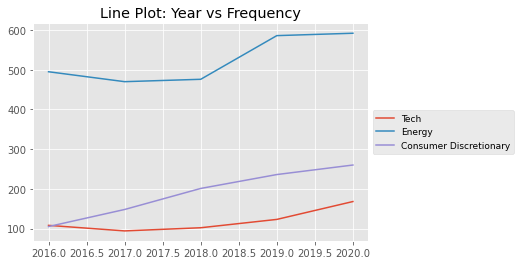

In [64]:
fig, ax = plt.subplots()
ax.plot(tech_companiesDF.groupby('Year')['Frequency'].sum())
ax.plot(energy_companiesDF.groupby('Year')['Frequency'].sum())
ax.plot(cd_companiesDF.groupby('Year')['Frequency'].sum())
ax.legend(['Tech','Energy','Consumer Discretionary'],loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 9})
ax.set_title('Line Plot: Year vs Frequency')

In [30]:
plt.style.use('ggplot')
def visualizeFreqPerSector(DF, title, xMax):
    plt.plot(DF.groupby('Year')['Frequency'].sum())
    plt.xlim([2015,2021])
    plt.ylim([0,xMax])
    plt.title('Frequency of Special Words and Sector-specific words for '+ title + ' 2016-2020')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.show()

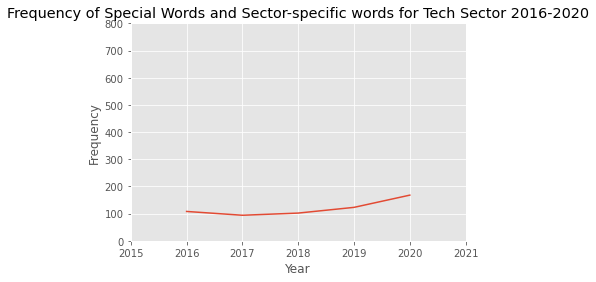

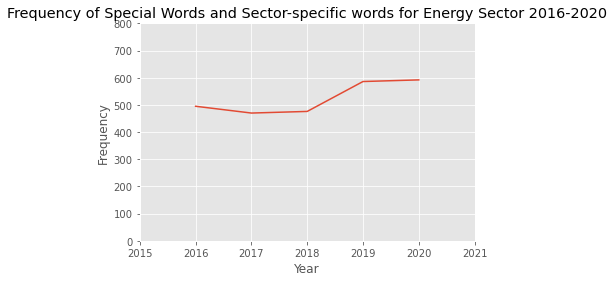

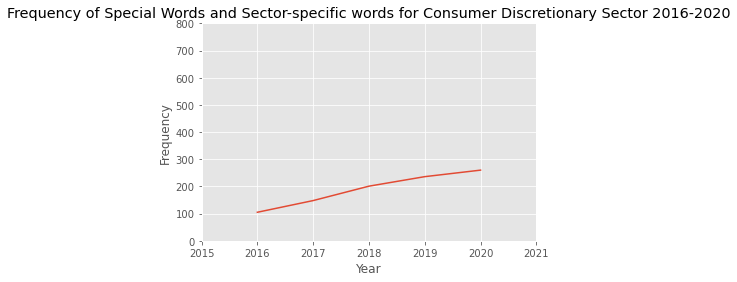

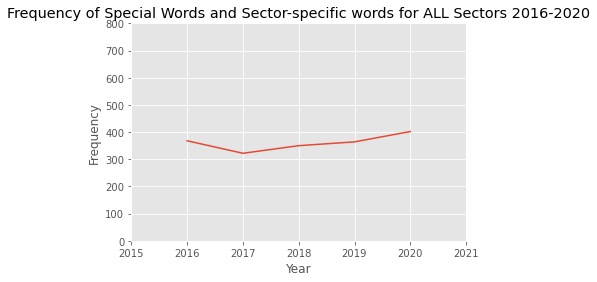

In [55]:
visualizeFreqPerSector(tech_companiesDF,'Tech Sector',800)
visualizeFreqPerSector(energy_companiesDF,'Energy Sector',800)
visualizeFreqPerSector(cd_companiesDF,'Consumer Discretionary Sector',800)
visualizeFreqPerSector(all_DF,'ALL Sectors',800)

In [32]:
plt.style.use('ggplot')
def visualizeFreqPerCompany(DF, title,xMax):
    DF['Year'] = DF['Year'].astype(int)
    DF.sort_values(by='Year', inplace=True, ascending=True)
    df = pd.DataFrame(dict(x= DF['Year'], y = DF['Frequency'], label = DF['Company']))
    groups = df.groupby('label')

    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.set_xlim([2015,2021])
    ax.set_ylim([0,xMax])
    ax.margins(0.05)
    for name, group in groups:
        ax.plot(group.x, group.y, marker='.', linestyle='', ms=9, label=name)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 9})
    plt.title('Frequency of Special Words and Sector-specific words per '+ title)
    plt.xlabel('Year')
    plt.ylabel('Frequency')

    plt.show()

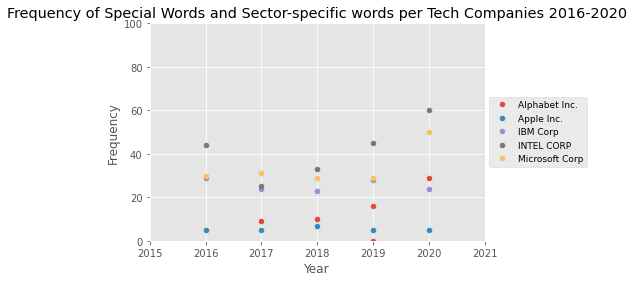

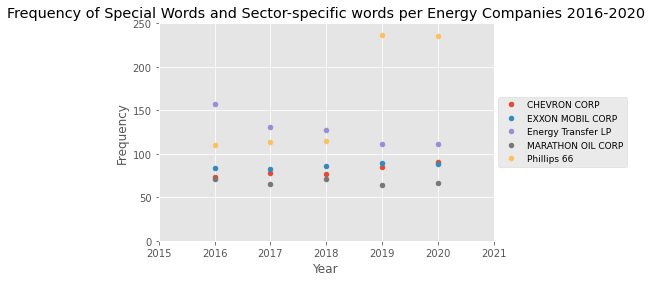

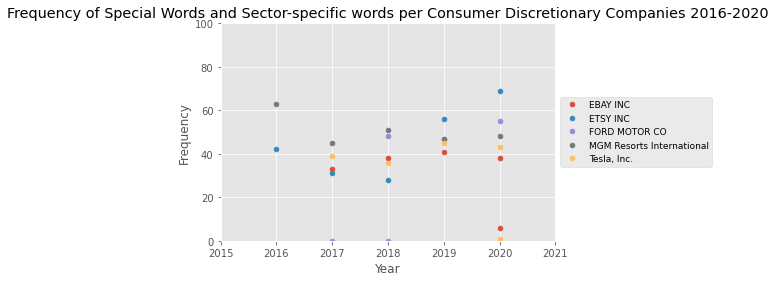

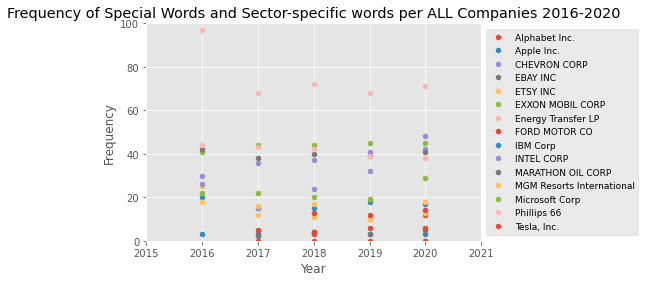

In [33]:
visualizeFreqPerCompany(tech_companiesDF,'Tech Companies 2016-2020',100)
visualizeFreqPerCompany(energy_companiesDF,'Energy Companies 2016-2020',250)
visualizeFreqPerCompany(cd_companiesDF,'Consumer Discretionary Companies 2016-2020',100)
visualizeFreqPerCompany(all_DF,'ALL Companies 2016-2020',100)

### Streamgraph

In [34]:
import altair as alt
from vega_datasets import data

In [35]:
all_DF = all_DF.sort_values(by =['Sector'])
all_DF

,Company,CIK,Filing_Date,Year,Sector,TEXT,Frequency
Index,,,,,,,
7,EBAY INC,0001065088,2019-01-30,2019,Consumer Discretionary,document accelerated united exchange commissio...,3
5,EBAY INC,0001065088,2020-04-29,2020,Consumer Discretionary,true large accelerated filer table contents un...,0
21,ETSY INC,0001370637,2019-02-28,2019,Consumer Discretionary,document united exchange _____________________...,10
15,"Tesla, Inc.",0001318605,2020-04-28,2020,Consumer Discretionary,tslaka_htm false large accelerated filer unite...,0
20,ETSY INC,0001370637,2020-02-27,2020,Consumer Discretionary,document united exchange _____________________...,13
...,...,...,...,...,...,...,...
11,Microsoft Corp,0000789019,2019-08-01,2019,Technology,msftk_htm united exchange commission form k an...,19
16,IBM Corp,0000051143,2019-02-26,2019,Technology,click rapidly navigate document united exchang...,18
1,Alphabet Inc.,0001652044,2019-02-06,2019,Technology,amendment form k united exchange commission fo...,0


In [36]:
import altair as alt
from vega_datasets import data

source = data.unemployment_across_industries.url

alt.Chart(source).mark_area().encode(
    alt.X('yearmonth(date):T',
        axis=alt.Axis(format='%Y', domain=False, tickSize=0)
    ),
    alt.Y('sum(count):Q', stack='center', axis=None),
    alt.Color('series:N',
        scale=alt.Scale(scheme='category20b')
    )
).interactive()

alt.Chart(...)

In [37]:
json1 = all_DF.groupby('Sector')['Frequency'].sum().to_json()
json1

'{"Consumer Discretionary":233,"Energy":1193,"Technology":380}'

In [38]:
def getFrequency(DF):
    techDF = tech_companiesDF.groupby('Year')['Frequency'].sum()
    json1 = techDF.to_json()
    json_obj = json.loads(json1)
    return [json_obj['2016'], json_obj['2017'],json_obj['2018'],json_obj['2019'],json_obj['2020']]

In [39]:
techFreqList = getFrequency(tech_companiesDF)
energyFreqList = getFrequency(energy_companiesDF)
cdFreqList = getFrequency(cd_companiesDF)

In [40]:
df = pd.DataFrame({
    'Technology': techFreqList,
    'Energy': energyFreqList,
    'Consumer Discretionary': cdFreqList
 }, index=(2016,2017,2018,2019,2020))

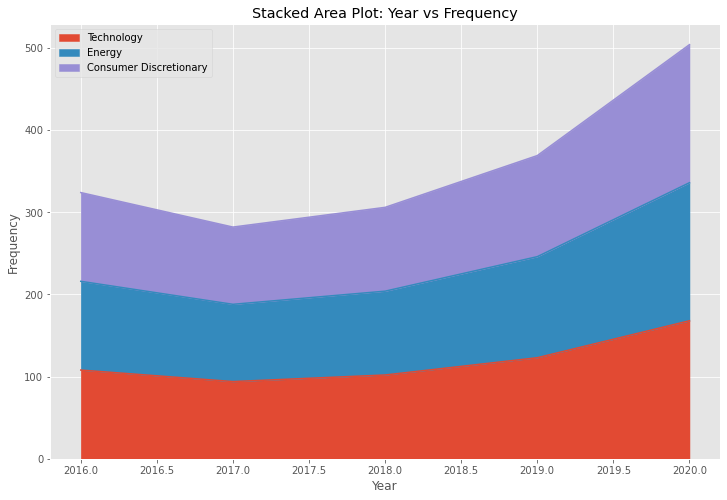

In [41]:
ax = df.plot.area(title = 'Stacked Area Plot: Year vs Frequency',xlabel = 'Year', ylabel = 'Frequency', figsize=(12, 8))

In [42]:
json_obj = json.loads(json1)
df2 = pd.DataFrame({
    'Technology': techFreqList,
    'Energy': energyFreqList,
    'Consumer Discretionary': cdFreqList
 }, index=(2016,2017,2018,2019,2020))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2aaadb5632b0>,
      dtype=object)

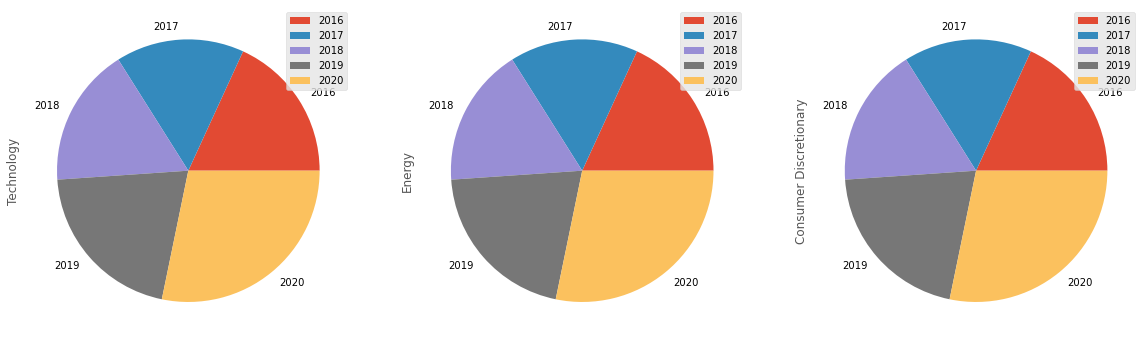

In [43]:
df2.plot.pie(subplots=True, figsize=(20, 20))


In [44]:
def jaccard(row, n=1):
    
    old=row['Story_1']
    new=row['Story_2']
    
    old_n_grams = [tuple(el) for el in TextBlob(old).ngrams(n)]
    new_n_grams = [tuple(el) for el in TextBlob(new).ngrams(n)]
        
    union = list(set(old_n_grams) | set(new_n_grams))
    intersection = list(set(old_n_grams) & set(new_n_grams))
    
    lu = len(union)
    li = len(intersection)
    
    return (li/lu,li,lu)

In [45]:
from textblob import Word
from textblob import TextBlob

In [46]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) # This suppresses a warning from scikit learn that they are going to update their code

In [47]:
# set1 = tech_companiesDF[['Index','Company','TEXT','Year']]
# set2 = energy_companiesDF[['Index','Company','TEXT','Year']]

In [48]:
def getSimilarity(DF1,DF2):
    set1 = DF1[['Index','Company','TEXT','Year']]
    set2 = DF2[['Index','Company','TEXT','Year']]

    set1['key']=1 
    set2['key']=1

    similarity = pd.merge(set1, set2, on ='key', suffixes=('_1', '_2')).drop("key", 1)
    similarity['Cosine_Similarity']=similarity.apply(lambda x: cosine(x),axis=1)
    return similarity

def get_cosine_sim(str1,str2): 
    vectors = [t for t in get_vectors([str1,str2])]
    return cosine_similarity(vectors)
    
def get_vectors(slist):
    text = [t for t in slist]
    vectorizer = CountVectorizer(text)
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()

def cosine(row):
    
    old=row['TEXT_1']
    new=row['TEXT_2']
    
    return get_cosine_sim(old,new)[0,1]

def visualizeSimilarity(metric,similarity, title):
    index = list(similarity['Year_1'].unique())
    columns = list(similarity['Year_2'].unique())
    df = pd.DataFrame(0, index=index, columns=columns)

    for i in df.index:
        sub = similarity[(similarity['Year_1']==i)]
        for col in df.columns:
            df.loc[i,col]=sub[sub['Year_2']==col][metric].iloc[0]

    plt.pcolor(df)
    plt.title("Cosine Similarity: " + title)
    plt.yticks(np.arange(0.1, len(df.index), 1), df.index)
    plt.xticks(np.arange(0.1, len(df.columns), 1), df.columns)
    plt.show()

## Tech Similarity to other sectors

In [ ]:
metric = 'Cosine_Similarity'
similarity_Tech_Energy = getSimilarity(tech_companiesDF,energy_companiesDF)
visualizeSimilarity(metric, similarity_Tech_Energy,'Tech vs Energy')

similarity_Tech_CD = getSimilarity(tech_companiesDF,cd_companiesDF)
visualizeSimilarity(metric, similarity_Tech_CD,'Tech vs Consumer Discretionary')

<ipython-input-48-da4b0e4922d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set1['key']=1
<ipython-input-48-da4b0e4922d2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set2['key']=1


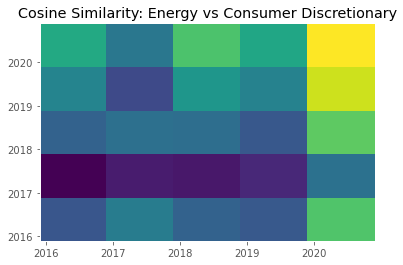

In [50]:
metric = 'Cosine_Similarity'
similarity_Energy_Tech = getSimilarity(energy_companiesDF,tech_companiesDF)
visualizeSimilarity(metric, similarity_Energy_Tech,'Energy vs Tech')

similarity_Energy_CD = getSimilarity(energy_companiesDF,cd_companiesDF)
visualizeSimilarity(metric, similarity_Energy_CD,'Energy vs Consumer Discretionary')

<ipython-input-48-da4b0e4922d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set1['key']=1
<ipython-input-48-da4b0e4922d2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set2['key']=1


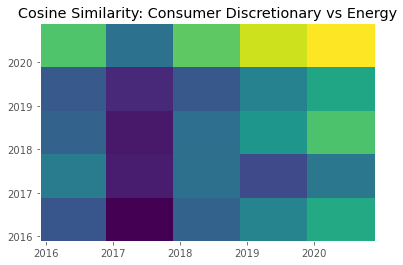

<ipython-input-48-da4b0e4922d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set1['key']=1
<ipython-input-48-da4b0e4922d2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set2['key']=1


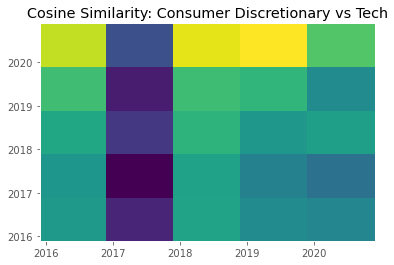

In [51]:
metric = 'Cosine_Similarity'
similarity_CD_Energy = getSimilarity(cd_companiesDF,energy_companiesDF)
visualizeSimilarity(metric, similarity_CD_Energy,'Consumer Discretionary vs Energy')

similarity_CD_Tech = getSimilarity(cd_companiesDF,tech_companiesDF)
visualizeSimilarity(metric, similarity_CD_Tech,'Consumer Discretionary vs Tech')

In [52]:
def jaccard(row, n=1):
    
    old=row['TEXT_1']
    new=row['TEXT_2']
    
    old_n_grams = [tuple(el) for el in TextBlob(old).ngrams(n)]
    new_n_grams = [tuple(el) for el in TextBlob(new).ngrams(n)]
        
    union = list(set(old_n_grams) | set(new_n_grams))
    intersection = list(set(old_n_grams) & set(new_n_grams))
    
    lu = len(union)
    li = len(intersection)
    
    return (li/lu,li,lu)

In [53]:
for i in [1,2]: # Add values to the list for the n-gram you're interested in
    similarity['Jaccard_Index_for_{}_grams'.format(i)]=similarity.apply(lambda x: jaccard(x,i)[0],axis=1)

NameError: name 'similarity' is not defined

In [ ]:
similarity['Intersection']=similarity.apply(lambda x: jaccard(x)[1],axis=1)

In [ ]:
similarity['Union']=similarity.apply(lambda x: jaccard(x)[2],axis=1)

In [ ]:
similarity.head()

In [ ]:
metric = 'Jaccard_Index_for_1_grams'

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

index = list(similarity['Index_1'].unique())
columns = list(similarity['Index_2'].unique())
df = pd.DataFrame(0, index=index, columns=columns)

for i in df.index:
    sub = similarity[(similarity['Index_1']==i)]
    for col in df.columns:
        df.loc[i,col]=sub[sub['Index_2']==col][metric].iloc[0]
        
plt.pcolor(df)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.show()

In [ ]:
similarity[['Company_1','Index_1','Company_2','Index_2',metric]].sort_values(by=metric,ascending=False)

In [ ]:
similarity['Cosine_Similarity']=similarity.apply(lambda x: cosine(x),axis=1)

In [ ]:
metric = 'Cosine_Similarity'
#metric = 'Jaccard_Index_for_1_grams'

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

index = list(similarity['Year_1'].unique())
columns = list(similarity['Year_2'].unique())
df = pd.DataFrame(0, index=index, columns=columns)

for i in df.index:
    sub = similarity[(similarity['Year_1']==i)]
    for col in df.columns:
        df.loc[i,col]=sub[sub['Year_2']==col][metric].iloc[0]
        
plt.pcolor(df)
plt.title("Cosine Similarity: Tech vs Energy")
plt.yticks(np.arange(0.1, len(df.index), 1), df.index)
plt.xticks(np.arange(0.1, len(df.columns), 1), df.columns)
plt.show()

In [ ]:
##